In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits
# import astropy.units as u

# import gala.coordinates as gc

In [9]:
plt.style.use('notebook')

In [2]:
t = Table(fits.getdata('../data/legacysurvey-bricks-dr7.fits.gz'))

In [3]:
t

brickname,ra,dec,nexp_g,nexp_r,nexp_z,nexphist_g [6],nexphist_r [6],nexphist_z [6],nobjs,npsf,nsimp,nrex,nexp,ndev,ncomp,psfsize_g,psfsize_r,psfsize_z,psfdepth_g,psfdepth_r,psfdepth_z,galdepth_g,galdepth_r,galdepth_z,ebv,trans_g,trans_r,trans_z,ext_g,ext_r,ext_z,wise_nobs [4],trans_wise [4],ext_w1,ext_w2,ext_w3,ext_w4
str8,float64,float64,int16,int16,int16,int32,int32,int32,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32
0001m002,0.125,-0.25,5,6,4,24968 .. 6051172,19578 .. 10474241,46299 .. 1907982,5644,2490,0,2434,523,188,9,1.6596661,1.2924303,1.068188,24.790665,24.645262,23.687878,24.586409,24.326422,23.293802,0.03402574,0.9041834,0.93440187,0.96275973,0.10935869,0.07366576,0.041205205,138 .. 12,0.99425024 .. 0.99971485,0.006260741,0.0038449126,0.0008199888,0.00030964034
0001m005,0.125,-0.5,4,6,3,165942 .. 765767,1201 .. 10280579,4213 .. 0,5567,1983,0,2672,644,253,15,1.6521722,1.2832937,1.0783478,24.678738,24.643381,23.544353,24.460396,24.32058,23.164818,0.04116949,0.8852634,0.9211858,0.955119,0.13231875,0.08913193,0.049856275,134 .. 13,0.9930473 .. 0.999655,0.0075751664,0.004652148,0.0009922094,0.00037463458
0001m007,0.125,-0.75,6,6,3,134912 .. 7403070,913 .. 7786008,4162 .. 0,5644,2042,0,2661,630,295,16,1.8400385,1.3273993,1.0783815,24.76929,24.548141,23.553368,24.58524,24.260008,23.17335,0.043467097,0.8792628,0.916975,0.9526745,0.13970324,0.09410624,0.052638642,135 .. 14,0.99266064 .. 0.99963576,0.007997993,0.004911825,0.0010475926,0.00039554492
0001m010,0.125,-1.0,7,4,3,21928 .. 10336513,41046 .. 3852408,37619 .. 0,5628,2194,0,2619,557,239,19,1.8105285,1.3227282,1.0430727,24.90124,24.564512,23.490965,24.711924,24.264574,23.082743,0.03797816,0.8936661,0.92706656,0.9585248,0.12206181,0.08222271,0.045991592,134 .. 12,0.9935845 .. 0.9996817,0.006987965,0.004291563,0.0009152605,0.0003456327
0001m012,0.125,-1.25,7,4,4,845 .. 10098566,1568 .. 5704276,2248 .. 0,5396,2211,0,2417,546,202,20,1.7765474,1.3105016,1.0556293,24.902866,24.66815,23.626198,24.711437,24.369892,23.225405,0.040892996,0.88598824,0.9216938,0.95541364,0.13143012,0.08853333,0.049521405,133 .. 13,0.99309385 .. 0.99965733,0.007524271,0.004620887,0.0009855377,0.00037210988
0001m015,0.125,-1.5,6,3,3,772 .. 10664263,2803 .. 0,3131 .. 0,5885,2411,0,2648,585,224,17,1.8524935,1.2560068,1.0615345,24.830956,24.599167,23.503721,24.65412,24.280567,23.114582,0.03661998,0.89726627,0.9295807,0.959978,0.11769664,0.07928227,0.04434682,133 .. 13,0.9938132 .. 0.9996931,0.0067380797,0.004138047,0.0008825524,0.00033326828
0001m017,0.125,-1.75,7,4,4,910 .. 10207630,3259 .. 0,3261 .. 0,5976,2372,0,2730,600,255,19,1.8344579,1.2413168,1.0495453,24.872885,24.67391,23.639816,24.693798,24.359129,23.235533,0.035687156,0.8997474,0.9313114,0.9609773,0.114698544,0.07726267,0.04321716,130 .. 12,0.99397033 .. 0.99970096,0.006566443,0.0040326184,0.00086007826,0.00032472334
0001m020,0.125,-2.0,6,3,4,4502 .. 10354889,9952 .. 436192,18717 .. 0,5931,2421,0,2647,603,252,8,1.8288481,1.2468685,1.0414103,24.838978,24.565796,23.648739,24.65044,24.264364,23.23956,0.03680654,0.8967709,0.929235,0.95977825,0.118296236,0.07968613,0.044572745,122 .. 12,0.9937818 .. 0.99969155,0.006772397,0.0041591595,0.00088702136,0.0003349514
0001m022,0.125,-2.25,7,4,4,1142 .. 10813421,2814 .. 2713220,5171 .. 2628781,5988,2454,0,2671,627,215,21,1.7899014,1.2888908,1.0323827,24.950603,24.590044,23.6739,24.761965,24.293253,23.255478,0.03654573,0.89746356,0.9297184,0.9600575,0.11745794,0.07912147,0.044256892,120 .. 10,0.9938257 .. 0.99969375,0.0067244703,0.0041296664,0.00088073895,0.0003325562


In [6]:
ind = (t['ra']>215) & (t['ra']<250) & (t['dec']>-10) & (t['dec']<10)

In [7]:
t = t[ind]

In [35]:
tp = Table(fits.getdata('../data/pal5_ls_lite_grz.fits'))

In [36]:
tflag = Table.read('../data/cmd_masks.fits')

In [37]:
tp = tp[tflag['gr_mask'] & tflag['grz_mask']]

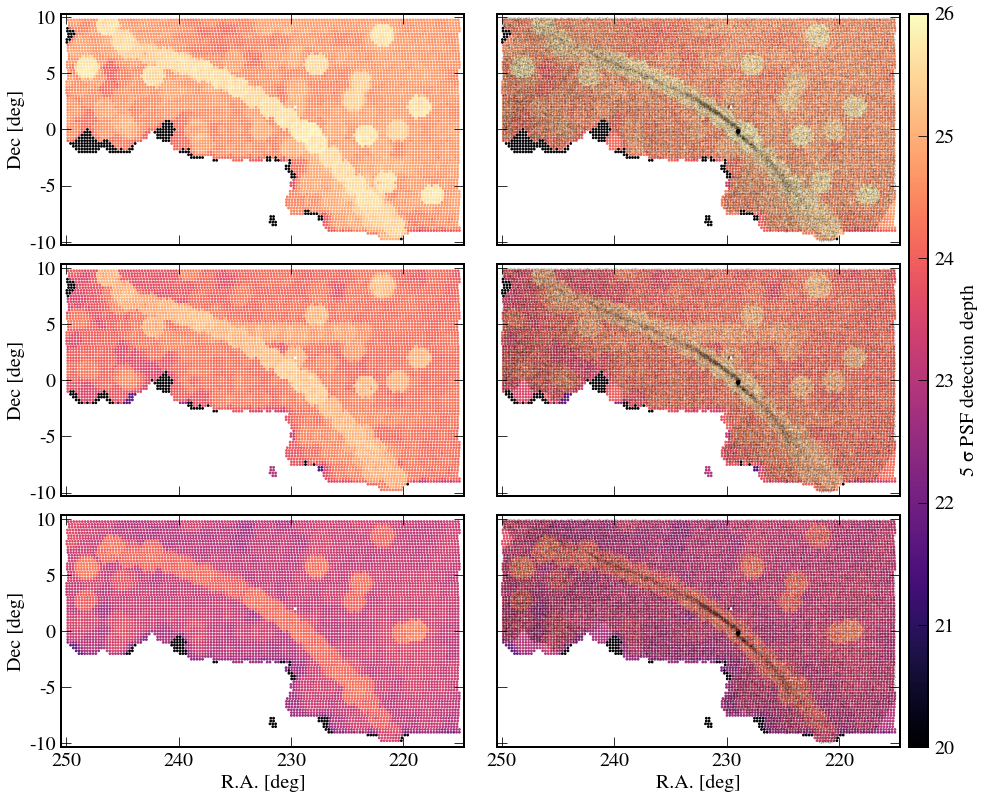

In [43]:
fig, ax = plt.subplots(3,2,figsize=(13,11.5), sharex=True, sharey=True)

for e, b in enumerate(['g', 'r', 'z']):
    plt.sca(ax[e][0])
    
    im = plt.scatter(t['ra'], t['dec'], c=t['psfdepth_{:1s}'.format(b)], 
                s=3, vmin=20, vmax=26, cmap='magma', rasterized=True)
    plt.xlim(250, 215)
    plt.ylim(-10, 10)
    plt.ylabel('Dec [deg]')
    plt.gca().set_aspect('equal')
    
    plt.sca(ax[e][1])
    im = plt.scatter(t['ra'], t['dec'], c=t['psfdepth_{:1s}'.format(b)], 
                s=3, vmin=20, vmax=26, cmap='magma', rasterized=True)
    plt.plot(tp['ra'], tp['dec'], 'k.', ms=0.5, alpha=0.1)

plt.xlabel('R.A. [deg]')
plt.sca(ax[2,0])
plt.xlabel('R.A. [deg]')
plt.tight_layout(h_pad=0.1)

[[x00,y00],[x01,y01]] = ax[0,1].get_position().get_points()
[[x10,y10],[x11,y11]] = ax[2,1].get_position().get_points()
pad = 0.01; width = 0.02
cbar_ax = fig.add_axes([x11+pad, y10, width, y01-y10])
plt.colorbar(im, cax=cbar_ax)
plt.ylabel('5 $\sigma$ PSF detection depth')


plt.savefig('../plots/ls_brick_depth_26.png', dpi=200)

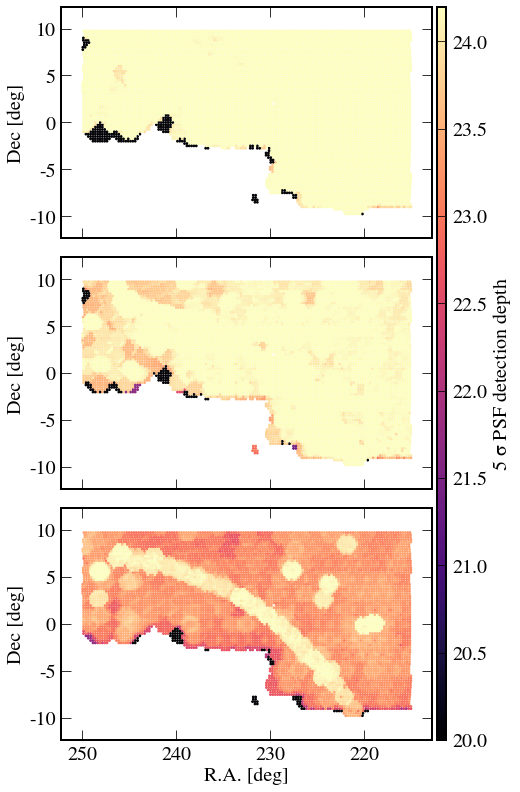

In [33]:
fig, ax = plt.subplots(3,1,figsize=(6.5,11.5), sharex=True, sharey=True)

for e, b in enumerate(['g', 'r', 'z']):
    plt.sca(ax[e])
    
    im = plt.scatter(t['ra'], t['dec'], c=t['psfdepth_{:1s}'.format(b)], 
                s=3, vmin=20, vmax=24.2, cmap='magma', rasterized=True)

    plt.xlim(250, 215)
    plt.ylim(-10, 10)
    plt.ylabel('Dec [deg]')

    plt.gca().set_aspect('equal')

plt.xlabel('R.A. [deg]')
plt.tight_layout(h_pad=0.1)

[[x00,y00],[x01,y01]] = ax[0].get_position().get_points()
[[x10,y10],[x11,y11]] = ax[2].get_position().get_points()
pad = 0.01; width = 0.02
cbar_ax = fig.add_axes([x11+pad, y10, width, y01-y10])
plt.colorbar(im, cax=cbar_ax)
plt.ylabel('5 $\sigma$ PSF detection depth')


plt.savefig('../plots/ls_brick_depth_24.png', dpi=200)